1. routest.txt
Limpando o dataframe
Par
2. trips.txt

In [69]:
import pandas as pd
import csv
import os

# 1. Trabalhando com os dados de routes.txt

O arquivo routes.txt do GTFS contém informações sobre as rotas do transporte público, como identificador único, nome completo e cor do letreiro usado para identificá-las

In [70]:
routes = pd.read_csv(
    'gtfs/routes.txt',
    header=0,
    usecols=['route_id', 'route_long_name', 'route_color']
)

In [71]:
routes

,route_id,route_long_name,route_color
0,1012-10,Term. Jd. Britania - Jd. Monte Belo,509E2F
1,1012-21,Jd. Rosinha - Term. Jd. Britânia,509E2F
2,1015-10,Term. Jd. Britânia - Chác. Maria Trindade,509E2F
3,1016-10,Cem. Do Horto - Shop. Center Norte,002F6C
4,1017-10,Perus - Conexão Vl. Iório,509E2F
...,...,...,...
1314,N839-11,Metrô Butantã - Metrô Vl. Mariana,FF671F
1315,N840-11,Term. Vl. Mariana - Sta. Cecília,FF671F
1316,N841-11,Term. Vl. Mariana - Sta. Cecília,FF671F
1317,N842-11,Term. Pinheiros - Cohab Raposo Tavares,FF671F


### Contando a ocorrência de cada cor na coluna "route_color" do dataframe routes.

In [72]:
colors = routes['route_color'].value_counts()
colors

0082BA    201
782F40    184
FFD100    182
509E2F    160
DA291C    158
002F6C    158
006341    132
FF671F    131
00B352      1
FFFF00      1
EE372F      1
007E5E      1
0455A1      1
C0C0C0      1
01A9A7      1
133C8D      1
F68368      1
049FC3      1
97A098      1
CA016B      1
9B3894      1
Name: route_color, dtype: int64

Para filtrar os dados, iremos remover as cores com apenas uma ocorrência. Para isso, utilizaremos um filtro que seleciona apenas os valores que aparecem mais de uma vez

In [73]:
# Filtrando as cores com mais de uma ocorrência
colors = colors[colors.values > 1]

In [74]:
colors

0082BA    201
782F40    184
FFD100    182
509E2F    160
DA291C    158
002F6C    158
006341    132
FF671F    131
Name: route_color, dtype: int64

**Visualizando as cores das linhas do sistema de transporte público da cidade de São Paulo em um gráfico de barras usando matplotlib**

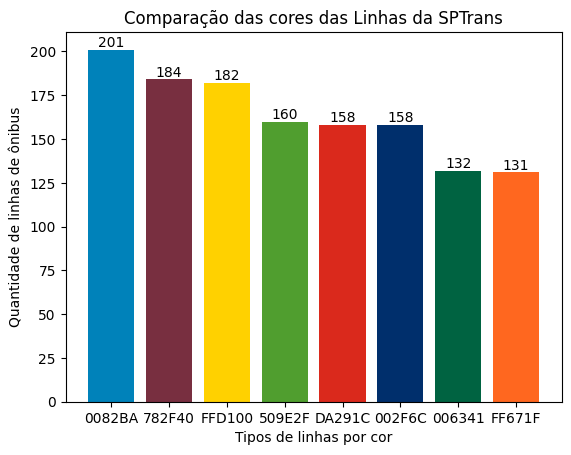

In [75]:
import matplotlib.pyplot as plt

# Dados
x = colors.index
y = colors.values
paleta_cores = ['#' + cor for cor in colors.index]

# Criando o gráfico
plt.bar(x, y, color=paleta_cores)

# Adicionando o valor de y dentro de cada barra
for i, v in enumerate(y):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Configurando o título e os eixos
plt.title('Comparação das cores das Linhas da SPTrans')
plt.xlabel('Tipos de linhas por cor')
plt.ylabel('Quantidade de linhas de ônibus')

# Setando o fundo como transparente
plt.gcf().set_facecolor('none')

# Exibindo o gráfico
plt.show()


Criando o DataFrame de referência das áreas de ônibus (https://www.sptrans.com.br/terminais)

In [76]:
# Transformando os índices das cores filtradas em uma lista (eixo x)
areas_color = colors.index.to_list()

# Definindo os nomes das áreas em uma lista, na ordem apresentada no gráfico
areas_name = ["Sul", "Sudoeste", "Nordeste", "Noroeste", "Leste", "Norte", "Sudeste", "Oeste"]

# Indexando as áreas pelos seus respectivos IDs no gráfico
areas_id = [6, 7, 3, 1, 4, 2, 5, 8]

# Criando o Dataframe
areas_sptrans = pd.DataFrame({'areas_id': areas_id, 'areas_name': areas_name, 'areas_color': areas_color})
areas_sptrans = areas_sptrans.sort_values('areas_id').reset_index(drop=True)

In [77]:
areas_sptrans

,areas_id,areas_name,areas_color
0,1,Noroeste,509E2F
1,2,Norte,002F6C
2,3,Nordeste,FFD100
3,4,Leste,DA291C
4,5,Sudeste,006341
5,6,Sul,0082BA
6,7,Sudoeste,782F40
7,8,Oeste,FF671F


Exportando o dataframe como um arquivo CSV

In [78]:
areas_sptrans.to_csv('sptransAreas.csv', index=False)

### Filtrando as rotas de ônibus que possuem as cores visualizadas no gráfico.

Separando o código de serviço de linhas para poder visualizar os tipos de linhas

In [79]:
# extrair o número após o '-' na coluna 'route_id' usando uma expressão regular
routes['route_code'] = routes['route_id'].str.extract(r'-(\d+)')

In [80]:
routes

,route_id,route_long_name,route_color,route_code
0,1012-10,Term. Jd. Britania - Jd. Monte Belo,509E2F,10
1,1012-21,Jd. Rosinha - Term. Jd. Britânia,509E2F,21
2,1015-10,Term. Jd. Britânia - Chác. Maria Trindade,509E2F,10
3,1016-10,Cem. Do Horto - Shop. Center Norte,002F6C,10
4,1017-10,Perus - Conexão Vl. Iório,509E2F,10
...,...,...,...,...
1314,N839-11,Metrô Butantã - Metrô Vl. Mariana,FF671F,11
1315,N840-11,Term. Vl. Mariana - Sta. Cecília,FF671F,11
1316,N841-11,Term. Vl. Mariana - Sta. Cecília,FF671F,11
1317,N842-11,Term. Pinheiros - Cohab Raposo Tavares,FF671F,11


Os tipos de linhas de acordo com o wikipedia (https://pt.wikipedia.org/wiki/S%C3%A3o_Paulo_Transporte) são: 

| Código | Tipo | Descrição |
| ------ | -------- | --------------- |
| 10 | Linha Base | linhas principal, linha tronco |
| 11 | Linha Noturna | faz parte da rede de ônibus da madrugada |
| 21 a 29 | Retorno | opera apenas em parte do trecho da linha base |
| 31 a 39 | Derivação | tem em geral o mesmo início e fim da linha base, mas deriva durante o trajeto
| 41 a 49 | Bifurcação | percorre parte do trajeto da linha tronco mas se bifurca após um determinado ponto, tendo seu ponto inicial ou final diferente da linha base |
| 51 a 59 | Prolongamento | segue além do ponto inicial ou final da linha base |

In [81]:
# filtrando as rotas de ônibus que possuem as cores especificadas
color_filter = routes["route_color"].isin(areas_sptrans['areas_color'])
bus_routes = routes.loc[color_filter]

# imprimindo as rotas de ônibus filtradas
bus_routes

,route_id,route_long_name,route_color,route_code
0,1012-10,Term. Jd. Britania - Jd. Monte Belo,509E2F,10
1,1012-21,Jd. Rosinha - Term. Jd. Britânia,509E2F,21
2,1015-10,Term. Jd. Britânia - Chác. Maria Trindade,509E2F,10
3,1016-10,Cem. Do Horto - Shop. Center Norte,002F6C,10
4,1017-10,Perus - Conexão Vl. Iório,509E2F,10
...,...,...,...,...
1314,N839-11,Metrô Butantã - Metrô Vl. Mariana,FF671F,11
1315,N840-11,Term. Vl. Mariana - Sta. Cecília,FF671F,11
1316,N841-11,Term. Vl. Mariana - Sta. Cecília,FF671F,11
1317,N842-11,Term. Pinheiros - Cohab Raposo Tavares,FF671F,11


**Substituindo as cores da coluna 'route_color' pelo seu índice de área**

In [82]:
# Transformando as colunas 'areas_color' e 'areas_id' do dataframe 'areas_sptrans' em um dicionário
dict_replace = dict(zip(areas_sptrans['areas_color'], areas_sptrans['areas_id']))

# Criando uma nova coluna com os valores da coluna 'route_color' substituídos pelo seu id de área
bus_routes['route_areaid'] = bus_routes['route_color'].replace(dict_replace)
bus_routes

C:\Users\Sunshine\AppData\Local\Temp\ipykernel_2200\1986461375.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_routes['route_areaid'] = bus_routes['route_color'].replace(dict_replace)


,route_id,route_long_name,route_color,route_code,route_areaid
0,1012-10,Term. Jd. Britania - Jd. Monte Belo,509E2F,10,1
1,1012-21,Jd. Rosinha - Term. Jd. Britânia,509E2F,21,1
2,1015-10,Term. Jd. Britânia - Chác. Maria Trindade,509E2F,10,1
3,1016-10,Cem. Do Horto - Shop. Center Norte,002F6C,10,2
4,1017-10,Perus - Conexão Vl. Iório,509E2F,10,1
...,...,...,...,...,...
1314,N839-11,Metrô Butantã - Metrô Vl. Mariana,FF671F,11,8
1315,N840-11,Term. Vl. Mariana - Sta. Cecília,FF671F,11,8
1316,N841-11,Term. Vl. Mariana - Sta. Cecília,FF671F,11,8
1317,N842-11,Term. Pinheiros - Cohab Raposo Tavares,FF671F,11,8


In [83]:
# apagando a coluna 'route_color'
bus_routes = bus_routes.drop('route_color', axis=1)
bus_routes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1318
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   route_id         1306 non-null   object
 1   route_long_name  1306 non-null   object
 2   route_code       1306 non-null   object
 3   route_areaid     1306 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 51.0+ KB


O dataframe de rotas está completo e contém todas as informações relevantes. Agora vamos relacionar as informações do dataframe com as informações do arquivo trips.txt, usando a coluna 'route_id', que é comum aos dois dataframes. Isso nos permitirá associar as rotas de ônibus com suas respectivas viagens.

# 2. Trabalhando com os dados de trips.txt

O arquivo trips.txt contém informações sobre as viagens de ônibus, incluindo a direção da rota (ida e volta) e o identificador único de cada viagem. Além disso, o arquivo inclui o identificador das coordenadas do percurso percorrido pelo ônibus em cada viagem, que podem ser usadas para traçar a rota no mapa ou calcular a distância percorrida

In [84]:
# Selecionando apenas as colunas necessárias do arquivo trips.txt
trip_cols = ['route_id',      # identificador único da rota
             'trip_headsign', # indicação do destino da viagem
             'direction_id',  # identifica a direção da viagem (ida ou volta)
             'shape_id']      # identificador único das coordenadas do percurso percorrido

# Lendo o arquivo trips.txt e criando um dataframe com as informações relevantes
trips = pd.read_csv('gtfs/trips.txt', usecols=trip_cols)

In [85]:
trips

,route_id,trip_headsign,direction_id,shape_id
0,1012-10,Jd. Monte Belo,0,72757
1,1012-10,Term. Jd. Britania,1,80489
2,1012-21,Term. Jd. Britânia,0,80490
3,1015-10,Chác. Maria Trindade,0,78289
4,1016-10,Shop. Center Norte,0,72283
...,...,...,...,...
2233,N839-11,Metrô Vl. Mariana,0,63767
2234,N840-11,Sta. Cecília,0,79253
2235,N841-11,Sta. Cecília,0,68304
2236,N842-11,Cohab Raposo Tavares,0,80756


A coluna 'route_id' do dataframe 'trips' apresenta valores duplicados, pois o arquivo 'trips.txt' exibe tanto o percurso de ida quanto de volta de uma determinada rota. Isso é identificado pelo letreiro em 'trip_headsign'. Linhas circulares têm apenas uma aparição, enquanto outras têm duas, uma para cada sentido da rota. Portanto, a duplicação dos valores na coluna 'route_id' é esperada e não indica um erro nos dados.

Isso pode ser verificado:

In [86]:
type_routes = trips['route_id'].value_counts()
type_routes

1012-10    2
6078-10    2
6063-41    2
6063-42    2
6063-43    2
          ..
6063-21    1
605A-10    1
6055-10    1
6045-21    1
N843-11    1
Name: route_id, Length: 1294, dtype: int64

**Criando um relacionamento e mesclando o dataframe 'bus_lines' e 'trips' com base na coluna 'route_id'**

In [87]:
bus_routes_trips = bus_routes.merge(
    trips[['route_id', 'direction_id', 'shape_id']],
    on='route_id'
)

In [88]:
bus_routes_trips

,route_id,route_long_name,route_code,route_areaid,direction_id,shape_id
0,1012-10,Term. Jd. Britania - Jd. Monte Belo,10,1,0,72757
1,1012-10,Term. Jd. Britania - Jd. Monte Belo,10,1,1,80489
2,1012-21,Jd. Rosinha - Term. Jd. Britânia,21,1,0,80490
3,1015-10,Term. Jd. Britânia - Chác. Maria Trindade,10,1,0,78289
4,1016-10,Cem. Do Horto - Shop. Center Norte,10,2,0,72283
...,...,...,...,...,...,...
2207,N839-11,Metrô Butantã - Metrô Vl. Mariana,11,8,0,63767
2208,N840-11,Term. Vl. Mariana - Sta. Cecília,11,8,0,79253
2209,N841-11,Term. Vl. Mariana - Sta. Cecília,11,8,0,68304
2210,N842-11,Term. Pinheiros - Cohab Raposo Tavares,11,8,0,80756


Ao realizarmos o relacionamento entre as tabelas usando o atributo 'route_id', obtivemos acesso a duas colunas adicionais da tabela trips.txt: 'direction_id', que indica o ID da direção da rota (sendo 0 para a direção de ida e 1 para a direção de volta), e 'shape_id', que indica o código que corresponde às coordenadas geográficas do trajeto contidas no arquivo shapes.txt.

**Ainda trabalhando com o arquivo trips.txt para criar uma tabela de destinos**

In [89]:
trips

,route_id,trip_headsign,direction_id,shape_id
0,1012-10,Jd. Monte Belo,0,72757
1,1012-10,Term. Jd. Britania,1,80489
2,1012-21,Term. Jd. Britânia,0,80490
3,1015-10,Chác. Maria Trindade,0,78289
4,1016-10,Shop. Center Norte,0,72283
...,...,...,...,...
2233,N839-11,Metrô Vl. Mariana,0,63767
2234,N840-11,Sta. Cecília,0,79253
2235,N841-11,Sta. Cecília,0,68304
2236,N842-11,Cohab Raposo Tavares,0,80756


A coluna 'trip_headsign' contém o letreiro do ônibus, que especifica o destino da viagem. Portanto, é possível obter todos os destinos presentes no conjunto de dados e observar sua frequência de ocorrência usando a seguinte abordagem:

In [90]:
trips['trip_headsign'].value_counts()

Term. Pq. D. Pedro Ii    78
Term. Sto. Amaro         59
Metrô Itaquera           52
Metrô Santana            51
Term. Pinheiros          37
                         ..
Vl Matias                 1
Div. São Caetano          1
Limoeiro                  1
Pedreira                  1
Jd. Monte Belo            1
Name: trip_headsign, Length: 666, dtype: int64

Para uma melhor análise dos destinos, uma opção é dividir a visualização entre os tipos de linhas diurnas e noturnas, que geralmente têm terminações diferentes

In [94]:
# Criando uma coluna booleana para identificar as linhas noturnas que possuem o número da rota terminado em 11.
trips['N'] = trips['route_id'].str.contains('11').astype(int)
trips

,route_id,trip_headsign,direction_id,shape_id,N
0,1012-10,JD. MONTE BELO,0,72757,0
1,1012-10,TERM. JD. BRITANIA,1,80489,0
2,1012-21,TERM. JD. BRITÂNIA,0,80490,0
3,1015-10,CHÁC. MARIA TRINDADE,0,78289,0
4,1016-10,SHOP. CENTER NORTE,0,72283,0
...,...,...,...,...,...
2233,N839-11,METRÔ VL. MARIANA,0,63767,1
2234,N840-11,STA. CECÍLIA,0,79253,1
2235,N841-11,STA. CECÍLIA,0,68304,1
2236,N842-11,COHAB RAPOSO TAVARES,0,80756,1


Alguns destinos podem apresentar letras maiúsculas ou minúsculas e/ou espaços extras no início ou no final do texto. Para garantir uma contagem precisa da frequência dos destinos, irei padronizar todas as informações em maiúsculas e remover os espaços extras

In [102]:
trips['trip_headsign'] = trips['trip_headsign'].str.upper().str.strip()

In [108]:
# Frequência dos destinos nas linhas diurnas
freqDiurna = trips[trips['N'] == 0]['trip_headsign'].value_counts()
freqDiurna

TERM. PQ. D. PEDRO II      52
TERM. STO. AMARO           48
METRÔ SANTANA              47
METRÔ ITAQUERA             47
STO. AMARO                 33
                           ..
METRÔ VL. PRUDENTE          1
JD. REDIL                   1
JD. SOARES                  1
CONJ. MANOEL DA NÓBREGA     1
CHÁCARA KLABIN              1
Name: trip_headsign, Length: 628, dtype: int64

In [107]:
# Frequência dos destinos nas linhas noturnas
freqNoturna = trips[trips['N'] == 1]['trip_headsign'].value_counts()
freqNoturna

TERM. PQ. D. PEDRO II    26
TERM. STO. AMARO         11
TERM. PINHEIROS          10
TERM. GRAJAÚ              7
TERM. SÃO MATEUS          7
                         ..
CID. D’ABRIL 3ª GLEBA     1
PQ. SÃO DOMINGOS          1
VL. PIAUÍ                 1
METRÔ BARRA FUNDA         1
PQ. ARARIBA               1
Name: trip_headsign, Length: 145, dtype: int64

Exportando os dados dos destinos separadamente em arquivos CSV para uma análise posterior

In [115]:
# Exporta os destinos das linhas diurnas em um arquivo CSV
freqDiurna.reset_index().to_csv('daytime_destination.csv', header=['trip_headsign', 'freq'], index=False)

# Exporta os destinos das linhas noturnas em um arquivo CSV
freqNoturna.reset_index().to_csv('nighttime_destination.csv', header=['trip_headsign', 'freq'], index=False)

# 3. Trabalhando com os dados do arquivo shapes.txt

O arquivo shapes.txt contém informações sobre as coordenadas geográficas que representam o trajeto percorrido por todas as rotas. Ele é muito útil para visualização e análise de rotas de ônibus em mapas e sistemas de informações geográficas (GIS).

In [116]:
shapes = pd.read_csv(
    'gtfs/shapes.txt',
    usecols=['shape_id', 'shape_dist_traveled']
)

In [117]:
shapes

,shape_id,shape_dist_traveled
0,72757,0.000000
1,72757,6.504682
2,72757,65.418427
3,72757,78.136925
4,72757,82.364815
...,...,...
1124853,62557,24200.133000
1124854,62557,24289.080000
1124855,62557,24308.193000
1124856,62557,24326.105000


Nesta análise, não é necessário trabalhar com informações específicas das rotas de ônibus, mas sim com o tamanho das rotas. Para isso, iremos obter essa informação a partir do 'shape_id' do dataframe shapes mesclado com o dataframe bus_route_trips

**Extraindo o comprimento final de cada 'shape_id'**

In [123]:
final_km = shapes.drop_duplicates(subset='shape_id', keep='last')
final_km

,shape_id,shape_dist_traveled
286,72757,6966.6655
572,80489,6612.5259
735,80490,4060.4060
1105,78289,15113.7490
1501,72283,11089.3730
...,...,...
1121229,63767,24595.5590
1121608,79253,18574.6580
1121980,68304,15825.3000
1123777,80756,50210.2230


**Mesclando o dataframe 'bus_routes_trips' com 'final_km' pelo 'shape_id'**

In [132]:
final_frame = bus_routes_trips.merge(
    final_km[['shape_id', 'shape_dist_traveled']],
    on='shape_id'
)

Exibindo o dataframe relacionado

In [133]:
final_frame

,route_id,route_long_name,route_code,route_areaid,direction_id,shape_id,shape_dist_traveled
0,1012-10,Term. Jd. Britania - Jd. Monte Belo,10,1,0,72757,6966.6655
1,1012-10,Term. Jd. Britania - Jd. Monte Belo,10,1,1,80489,6612.5259
2,1012-21,Jd. Rosinha - Term. Jd. Britânia,21,1,0,80490,4060.4060
3,1015-10,Term. Jd. Britânia - Chác. Maria Trindade,10,1,0,78289,15113.7490
4,1016-10,Cem. Do Horto - Shop. Center Norte,10,2,0,72283,11089.3730
...,...,...,...,...,...,...,...
2207,N839-11,Metrô Butantã - Metrô Vl. Mariana,11,8,0,63767,24595.5590
2208,N840-11,Term. Vl. Mariana - Sta. Cecília,11,8,0,79253,18574.6580
2209,N841-11,Term. Vl. Mariana - Sta. Cecília,11,8,0,68304,15825.3000
2210,N842-11,Term. Pinheiros - Cohab Raposo Tavares,11,8,0,80756,50210.2230


Obtendo as maiores rotas em comprimento (km).

In [136]:
most = final_frame.sort_values('shape_dist_traveled', ascending=False)
most

,route_id,route_long_name,route_code,route_areaid,direction_id,shape_id,shape_dist_traveled
2210,N842-11,Term. Pinheiros - Cohab Raposo Tavares,11,8,0,80756,50210.2230
2026,N137-11,Term. Pirituba - Perus,11,1,0,80212,48424.3320
1441,6913-21,Term. Varginha - Itaim Bibi,21,6,0,72682,48157.6880
1003,5194-10,Jd. Apurá - Pq. Ibirapuera,10,6,0,80173,46691.0230
1585,7282-10,Pq. Continental - Pça. Ramos De Azevedo,10,8,0,73012,45108.1450
...,...,...,...,...,...,...,...
1539,7053-21,Jd. Maria Sampaio - Term. Campo Limpo,21,7,1,71357,2279.2024
1677,8017-21,Voith - Cptm Vl. Aurora,21,1,0,79678,2159.8213
466,3006-21,Etec Guaianazes - Cptm Guaianazes,21,3,0,70825,2138.4150
589,372F-10,Univ. São Judas Tadeu - Metrô Bresser,10,4,0,68412,1779.2197


Rotas de linha base (terminadas em 10)

In [140]:
df_filtered = most[most['route_code'] == '10']
df_filtered

,route_id,route_long_name,route_code,route_areaid,direction_id,shape_id,shape_dist_traveled


Exportando o dataframe relacionado em arquivo CSV.

In [134]:
final_frame.to_csv('sptrans_lines.csv', index=False)